# **CSE 7324 Lab 1: Exploring Table Data**
### *Thomas Adams, Suleiman Hijazeen, Nancy Le and Andrew Whigham*
------

### **1. Business Understanding**
------

The data is useful in learning where carbon dioxide emissions employ the most such as in transport or electricity, residental or manufacturing. It is also useful to know the distribution of carbon dioxide emissions cross countries in the global
what kind of energy and industry each country have used in those years. 

When the Industrial Revolution took place, the consumption of fossil fuel caused an extreme increase in CO2 emissions. Since then,the rapid growth of CO2 emission impacted significantly on concentration of CO2 in global atmosphere. This impact disrupts the global carbon cycle and led to global warning. Atmospheric concentrations now reach its highest level 400ppm in the last three million years. 


According to https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions, cumulative CO2 emissions data which contains the cumulative emissions of each nation from 1750 to 2016. The data also contains sectoral emissions grouping such as energy, transport, residental, and industry.

The results from our results will catch attention of majority of people live in this planet. Since carbon dioxide (CO2) is gas essential for our lives and the planet and CO2 emissions affect the whole global not any country.


### **2. Data Understanding**
------

#### **2.1 Data Description**

This lab uses data collected from the Carbon Dioxide Information Analysis Center and specifically looks at the relationship between carbon dioxide measurements recorded by industry and that country's GDP.

In [68]:
# dependencies for lab 1
import pandas as pd
import numpy as np
import missingno as msno
# use plotly in offline mode to not have active connection to plotly servers
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.simplefilter('ignore', category=DeprecationWarning)
%matplotlib inline

In [69]:
# read in data to data frames
co2sec = pd.read_csv("data/global-carbon-dioxide-emissions-by-sector-gg-co.csv")
cumco2 = pd.read_csv("data/share-of-cumulative-co2.csv")
co2gdp = pd.read_csv("data/co-emissions-per-capita-vs-gdp-per-capita-international-.csv")
country_region = pd.read_csv("data/countries_regions.csv")

# separate country and regional data
co2sec_reg = co2sec[pd.isna(co2sec['Code'])]
cumco2_reg = cumco2[pd.isna(cumco2['Code'])]
c02gdp_reg = co2gdp[pd.isna(co2gdp['Code'])]

# remove regional data from orginal data frames
co2sec = co2sec[~pd.isna(co2sec['Code'])]
cumco2 = cumco2[~pd.isna(cumco2['Code'])]
co2gdp = co2gdp[~pd.isna(co2gdp['Code'])]

# merge dataframes. works like a sql inner join (i.e. non matching rows dropped)
# sector data merged with left join since we only have data thru 2010
country_comb = cumco2.merge(co2gdp, left_on=['Code', 'Year'], right_on=['Code', 'Year']).merge(co2sec, left_on=['Code', 'Year'], right_on=['Code', 'Year'])

# remove duplicate country attributes that were created during join
country_comb.drop(['Entity_x', 'Entity_y'], axis=1, inplace = True)

# remove data from before 1950 due to missing/incomplete data
country_comb = country_comb[(country_comb['Year']>=1990) & (country_comb['Year']<=2010)]

country_comb.head()

,Code,Year,Share of global cumulative CO₂ emissions (%),Per capita CO₂ emissions (tonnes per capita),GDP per capita (2011 int-$) ($),Total population (Gapminder),Entity,Transport,Forestry,Energy,Other sources,"Agriculture, Land Use & Forestry",Waste,Residential & commercial,Industry,Agriculture
0,AFG,1990,0.007,0.213,1992.0,13032161.0,Afghanistan,607.2770,0.0,277.4122,0,0.0,0.0,918.4148,118.8101,0.0
1,AFG,1991,0.007,0.188,1761.0,14069854.0,Afghanistan,531.4588,0.0,270.1278,0,0.0,0.0,690.8751,129.7491,0.0
2,AFG,1992,0.007,0.099,1629.0,15472076.0,Afghanistan,376.1294,0.0,154.5804,0,0.0,0.0,373.4546,141.6256,0.0
3,AFG,1993,0.007,0.089,1080.0,17053213.0,Afghanistan,323.7141,0.0,151.7126,0,0.0,0.0,325.8062,124.7280,0.0
4,AFG,1994,0.007,0.080,772.0,18553819.0,Afghanistan,310.3998,0.0,146.3426,0,0.0,0.0,265.0813,147.0716,0.0


The information was obtained from three datasets to produce a dataset with attribute describing a country's emissions by sector/industry, population and GDP for a given year. The data was merged together on the Country and Year attributes of all three dataset using the equivalent of an SQL inner join. This means that instances that did not have a match in all three datasets was dropped. Joining the tables this way also removed many inaccurate records such as records with bad years (e.g. Year was set to 1 in several instances, although some such as '9191' could easily be imputed). After the join, the data was filtered for a 20 year period between 1990 and 2010 because that time frame had the largest overlap for the dataset. 

Attribute descriptions are available in the below table.

Attribute | Description | Scale | Datatype
--- | --- | --- | ---
Entity | Full country name | Nominal | Object
Code | 3 letter country code | Nominal | Object
Year | Year data was recorded | Ordinal | Date
Share of global cumulative CO₂ emissions (%) | Country's share of global CO2 emission for that year | Interval | float64
Per capita CO₂ emissions (tonnes per capita) | Country's emission | Interval | float64
GDP per capita (2011 int-$) | GDP per capita in USD for that year using 2011 inflation | Interval | float64
Total population | Population for country in instance year | Interval | float64
Transport | Emission measurements from aviation, road transportation, rail transportation and other transportation | Interval | float64
Forestry | Emission measurements from net conversion of forest, cropland and burning biomass | Interval | float64
Energy | Emission measurements from energy manufacturing and construction industries. Includes public heat and electricity manufacture. | Interval | float64
Other sources | Fossil fuel fires and other anthropogenic emissions | Interval | float64
Agriculture | Methane and nitrous oxide emsssions from enteric fermentation; fertilizers. | Interval | float64
Waste | Solid waste disposal, incineration and wastewater | Interval | float64
Residential & commercial | Residential emissions. | Interval | float64
Industry | Production of chemicals and  | Interval | float64


#### **2.2 Data Quality**

There are 0 duplicate rows


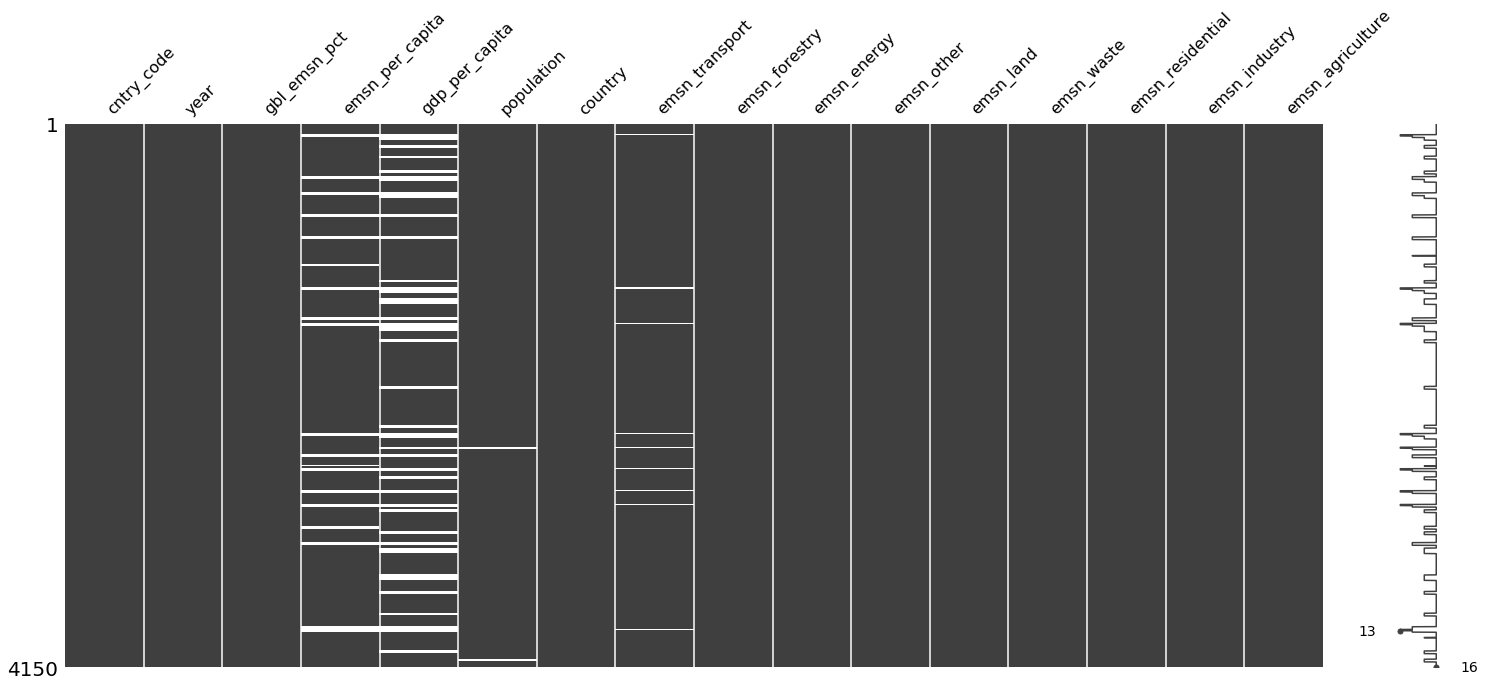

In [70]:
# Clean up column names
country_comb.columns = ['cntry_code', 'year', 'gbl_emsn_pct', 'emsn_per_capita', 'gdp_per_capita', 'population', 'country', 'emsn_transport', 'emsn_forestry', 'emsn_energy','emsn_other', 'emsn_land', 'emsn_waste', 'emsn_residential', 'emsn_industry', 'emsn_agriculture']

# Check for duplicated data
dups = country_comb.duplicated().to_frame()
print("There are {} duplicate rows".format(len(dups[dups[0] == True])))

# Examine missing data
msno.matrix(country_comb)

0 records missing from cntry_code.
0 records missing from year.
0 records missing from gbl_emsn_pct.
380 records missing from emsn_per_capita.
899 records missing from gdp_per_capita.
43 records missing from population.
0 records missing from country.
86 records missing from emsn_transport.
0 records missing from emsn_forestry.
0 records missing from emsn_energy.
0 records missing from emsn_other.
0 records missing from emsn_land.
0 records missing from emsn_waste.
0 records missing from emsn_residential.
0 records missing from emsn_industry.
0 records missing from emsn_agriculture.
Countries missing transport emissions data: ['Anguilla', 'Faeroe Islands', 'Greenland', 'Marshall Islands', 'Micronesia (country)', 'Nauru', 'Niue', 'Palau', 'Tuvalu']


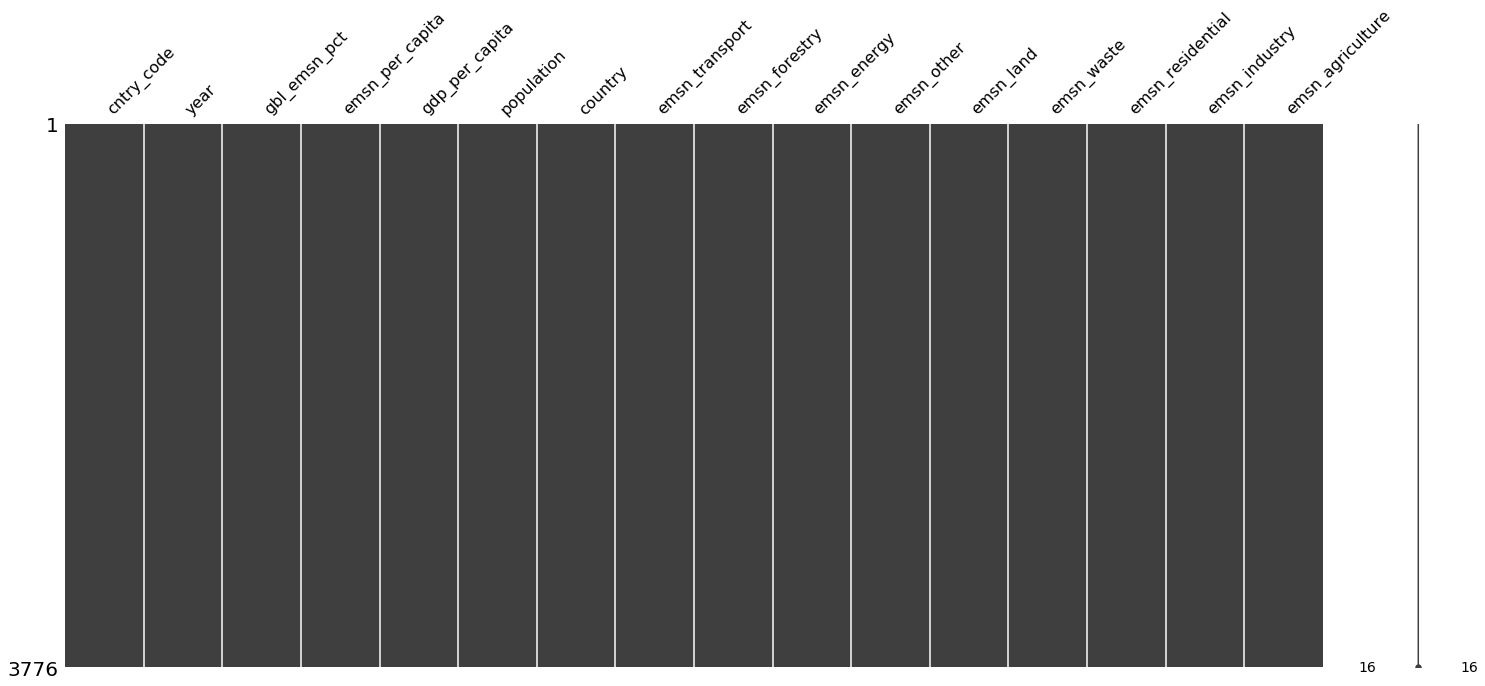

In [71]:
# count missing records
for column in country_comb:
    print('{} records missing from {}.'.format(len(country_comb[pd.isna(country_comb[column])]), column))

# check countries where missing this measurement data
print('Countries missing transport emissions data:', country_comb[pd.isna(country_comb['emsn_transport'])].country.unique().tolist())
    
# replace those missing measurements with 0
country_comb.fillna(value={'emsn_transport': 0}, inplace=True)

# Czechoslovakia is missing population data, use diff to impute missing vaules from Czech Republic
country_comb[pd.isna(country_comb['population'])]
# get the mean difference of population between years
meandiff = country_comb[country_comb['country'] == "Czech Republic"]['population'].diff().mean()
# get the earliest population year
minYpop = country_comb[(country_comb['country'] == "Czech Republic") & (country_comb['year'] == country_comb[country_comb['country'] == "Czech Republic"]['year'].min())]['population'].tolist()[0]   
# loop over records in descending order to fill in missing data
for idx, row in country_comb[country_comb['country'] == 'Czechoslovakia'].sort_values(by=['year'], ascending=False).iterrows():
    country_comb.loc[idx, 'population'] = minYpop - meandiff
    minYpop -= meandiff

# remove rest of data without population
country_comb.drop(country_comb[pd.isna(country_comb['population'])].index, inplace=True)
# Remove rows without gdp and emissions per capita
country_comb.drop(country_comb[(pd.isna(country_comb['emsn_per_capita'])) & (pd.isna(country_comb['gdp_per_capita']))].index, inplace=True)
# set missing gdp to 0
country_comb.fillna(0, inplace=True)

#redraw missing data graph
msno.matrix(country_comb)

# some of our visualizations would benifit from region code. mergingin with dataset
country_comb = country_comb.merge(country_region, left_on=['cntry_code'], right_on=['cntry_code'])
country_comb.drop(['country_y'], axis=1, inplace = True)
country_comb.columns = ['cntry_code', 'year', 'gbl_emsn_pct', 'emsn_per_capita', 'gdp_per_capita', 'population', 'country', 'emsn_transport', 'emsn_forestry', 'emsn_energy','emsn_other', 'emsn_land', 'emsn_waste', 'emsn_residential', 'emsn_industry', 'emsn_agriculture', 'region']


The were several attribute missing data including emsn_transport, population, gpd_per_capita and emsn_per_capita. The missing emsn_transport data can be attributed to countries where there is very little transportation (i.e. artic countries or small islands) and these measurements are so low that they can be assumed to be 0. Of the missing population data, the population can be imputed based on the average population increase between the years with data. Two other countries, Micronesia and Yemen have no data and will be removed from the dataset.

There are 334 rows with no gdp per capita and no emission per capita. These rows will be removed since GDP per capita is one of the attributes this lab focuses on. Values for GDP per capita or emissions per capita where one or the other is missing but not both will be replaced with a 0.

There are also no duplicate rows in the dataset.

### **3. Data Visualization**
------

In [92]:
# Visualization imports
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')
import cufflinks as cf
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

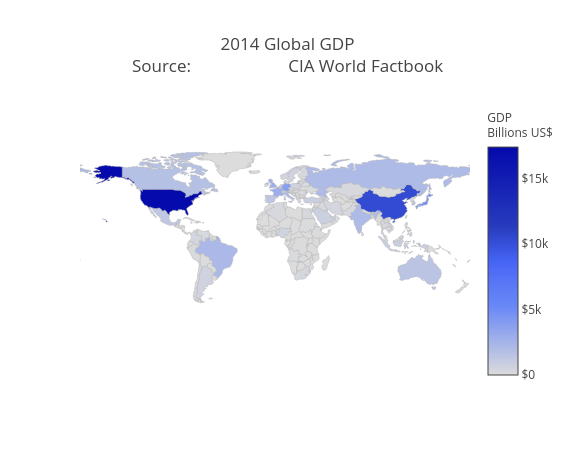

In [87]:
## WE NEED TO CITE THIS. LINK IS BROKEN !!!!!!!!!!!!!!
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [ dict(
       type = 'choropleth',
       locations = df['CODE'],
       z = df['GDP (BILLIONS)'],
       text = df['COUNTRY'],
       colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
           [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
       autocolorscale = False,
       reversescale = True,
       marker = dict(
           line = dict (
               color = 'rgb(180,180,180)',
               width = 0.5
           ) ),
       colorbar = dict(
           autotick = False,
           tickprefix = '$',
           title = 'GDP<br>Billions US$'),
     ) ]

layout = dict(
   title = '2014 Global GDP<br>Source:\
           <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
           CIA World Factbook</a>',
   geo = dict(
       showframe = False,
       showcoastlines = False,
       projection = dict(
           type = 'Mercator'
       )
   )
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='d3-world-map' )

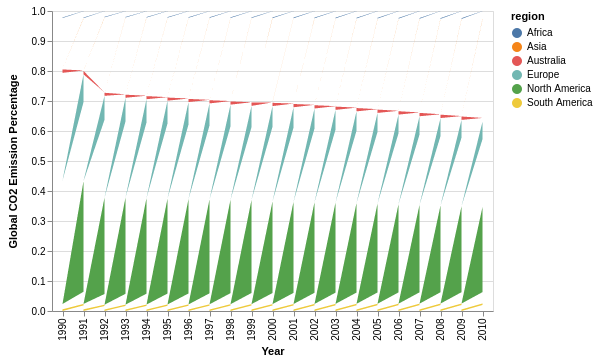

In [86]:
# chart co2 by region
alt.renderers.enable('default')
alt.Chart(country_comb).mark_area().encode(
    x=alt.X("year:N", axis=alt.Axis(title="Year")),
    y=alt.Y("gbl_emsn_pct", stack="normalize", axis=alt.Axis(format="%", title="Global CO2 Emission Percentage")),
    color="region:N"
)

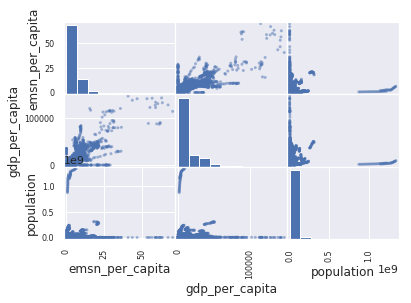

In [102]:
# scatter matrix
ax = scatter_matrix(country_comb[['emsn_per_capita', 'gdp_per_capita', 'population']])
plt.show()


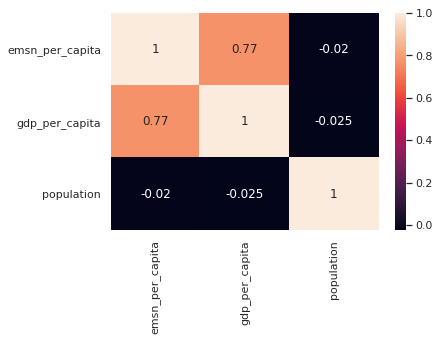

In [103]:
# heatmap of emission per capita
cmap = sns.set(style="darkgrid")
sns.heatmap(country_comb[['emsn_per_capita', 'gdp_per_capita', 'population']].corr(), cmap=cmap, annot=True)

In [107]:
# pivot table
country_comb.pivot_table(values=['emsn_per_capita', 'gdp_per_capita', 'population'],index='region', aggfunc={'emsn_per_capita': np.mean, 'gdp_per_capita': np.mean, 'population': np.mean})

,emsn_per_capita,gdp_per_capita,population
region,,,
Africa,1.063722,4221.538967,1.524634e+07
Asia,6.908486,16569.992616,8.371969e+07
Australia,4.256238,5974.748918,2.812498e+06
Europe,7.600478,24356.937330,1.596749e+07
North America,5.294011,9073.841905,1.896215e+07
South America,2.355670,8384.164835,2.749164e+07


### **4. Dimensionality Reduction**
------
#### T-SNE

### **5. References**
------

[1] Boden, T.A., G. Marland, and R.J. Andres. 2017. Global, Regional, and National Fossil-Fuel CO2 Emissions. Carbon Dioxide Information Analysis Center, Oak Ridge National Laboratory, U.S. Department of Energy, Oak Ridge, Tenn., U.S.A. doi 10.3334/CDIAC/00001_V2017.